# Qiskit config

In [1]:
from qiskit import transpile

# Experiment

In [2]:
import numpy as np
import sys
sys.path.append('../../')
from qclib.state_preparation.schmidt import initialize


min_n = 3
max_n = 14
rnd = np.random.RandomState(42)

result = {}
for n in range(min_n, max_n+1):
    print('\nn = {0}'.format(n))

    N = 2**n
    input_state = ((1.0 - 0.01) * rnd.rand(N) + 0.01) + ((1.0 - 0.01) * rnd.rand(N) + 0.01) * 1j
    input_state = input_state/np.linalg.norm(input_state)

    result[n] = []
    
    #for r in [2**m for m in range(n//2+1)][::-1]: # iso:{1<=rank<2**(n_qubits//2)};uni:{rank=2**(n_qubits//2)}
    for m in list(range(n//2+1))[::-1]: # iso:{1<=rank<2**(n_qubits//2)};uni:{rank=2**(n_qubits//2)}
        r = 2**m
        circuit1 = initialize(input_state, low_rank = r)

        transpiled_circuit1 = transpile(circuit1, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)
        
        n_cx1 = transpiled_circuit1.count_ops()['cx']
        n_dp1 = transpiled_circuit1.depth()
        
        result[n].append([m, n_cx1, n_dp1])
        
        print('\trank = {0}\tCNOTs = {1}\tdepth = {2}'.format(r, n_cx1, n_dp1))
        
        


n = 3
	rank = 2	CNOTs = 4	depth = 9
	rank = 1	CNOTs = 1	depth = 3

n = 4
	rank = 4	CNOTs = 9	depth = 11
	rank = 2	CNOTs = 7	depth = 9
	rank = 1	CNOTs = 2	depth = 3

n = 5
	rank = 4	CNOTs = 30	depth = 53
	rank = 2	CNOTs = 14	depth = 23
	rank = 1	CNOTs = 5	depth = 9

n = 6
	rank = 8	CNOTs = 54	depth = 57
	rank = 4	CNOTs = 51	depth = 51
	rank = 2	CNOTs = 21	depth = 23
	rank = 1	CNOTs = 8	depth = 9

n = 7
	rank = 8	CNOTs = 150	depth = 243
	rank = 4	CNOTs = 84	depth = 115
	rank = 2	CNOTs = 36	depth = 51
	rank = 1	CNOTs = 13	depth = 11

n = 8
	rank = 16	CNOTs = 253	depth = 247
	rank = 8	CNOTs = 250	depth = 242
	rank = 4	CNOTs = 117	depth = 115
	rank = 2	CNOTs = 51	depth = 51
	rank = 1	CNOTs = 18	depth = 11

n = 9
	rank = 16	CNOTs = 660	depth = 1037
	rank = 8	CNOTs = 389	depth = 518
	rank = 4	CNOTs = 182	depth = 243
	rank = 2	CNOTs = 82	depth = 111
	rank = 1	CNOTs = 35	depth = 53

n = 10
	rank = 32	CNOTs = 1087	depth = 1081
	rank = 16	CNOTs = 1104	depth = 1074
	rank = 8	CNOTs = 528	depth = 5

# Plot

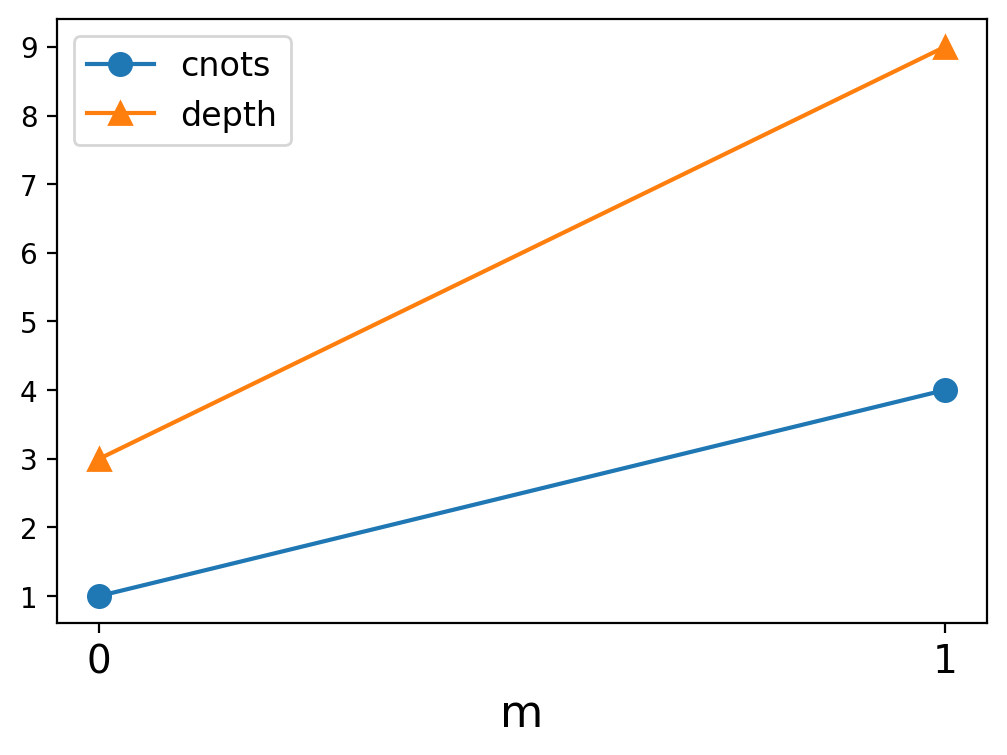

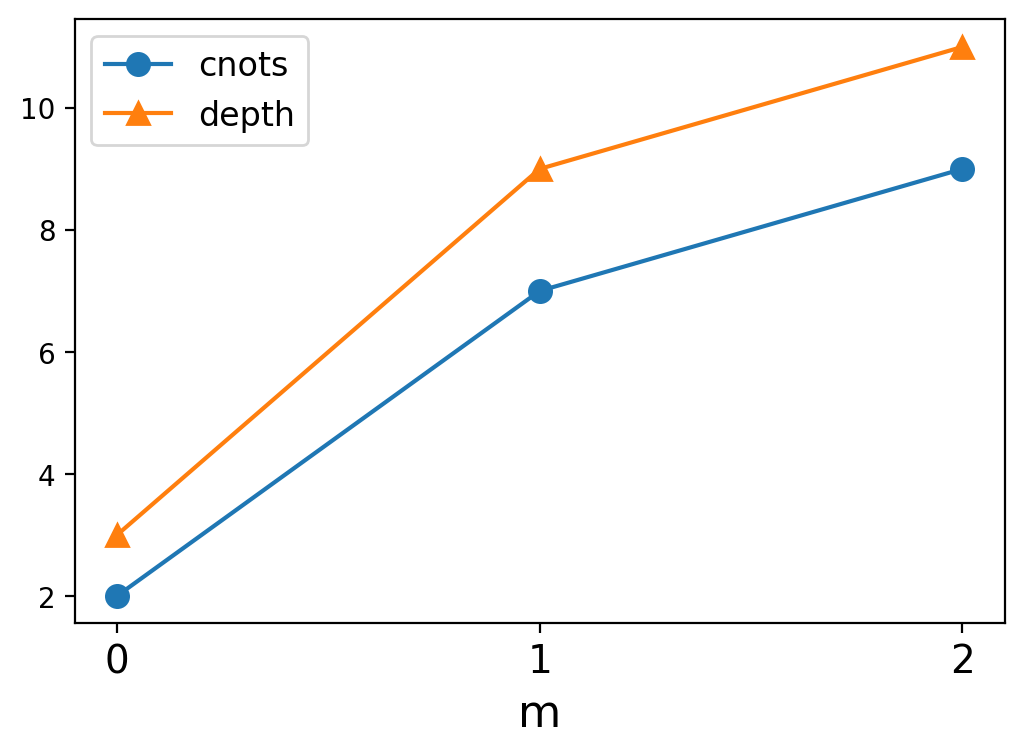

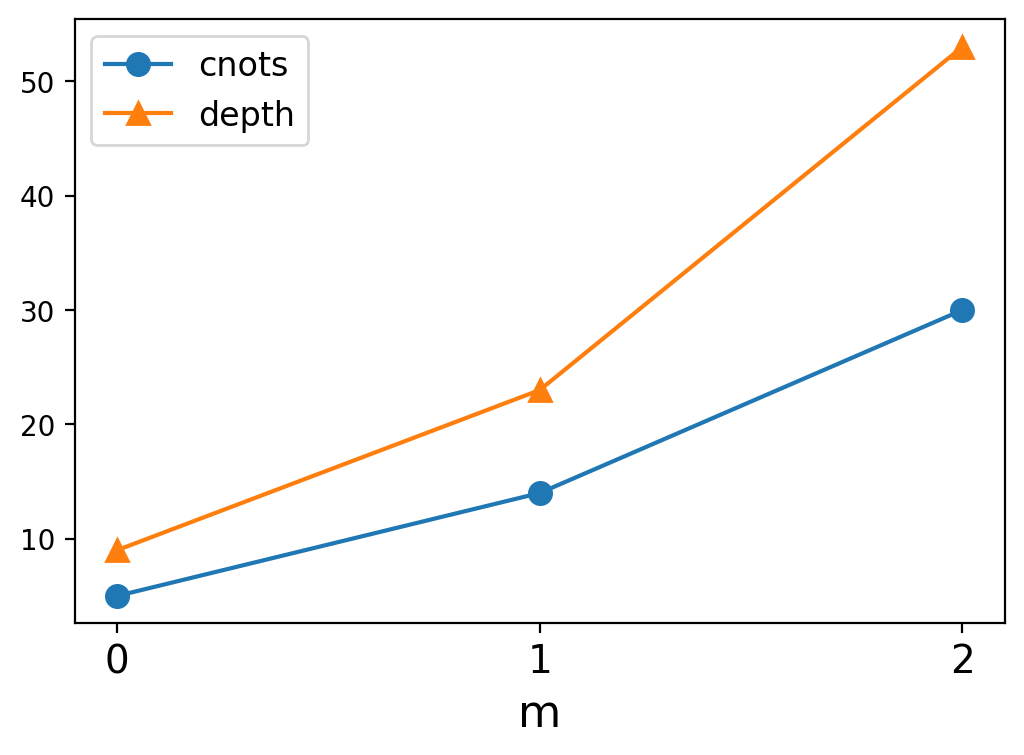

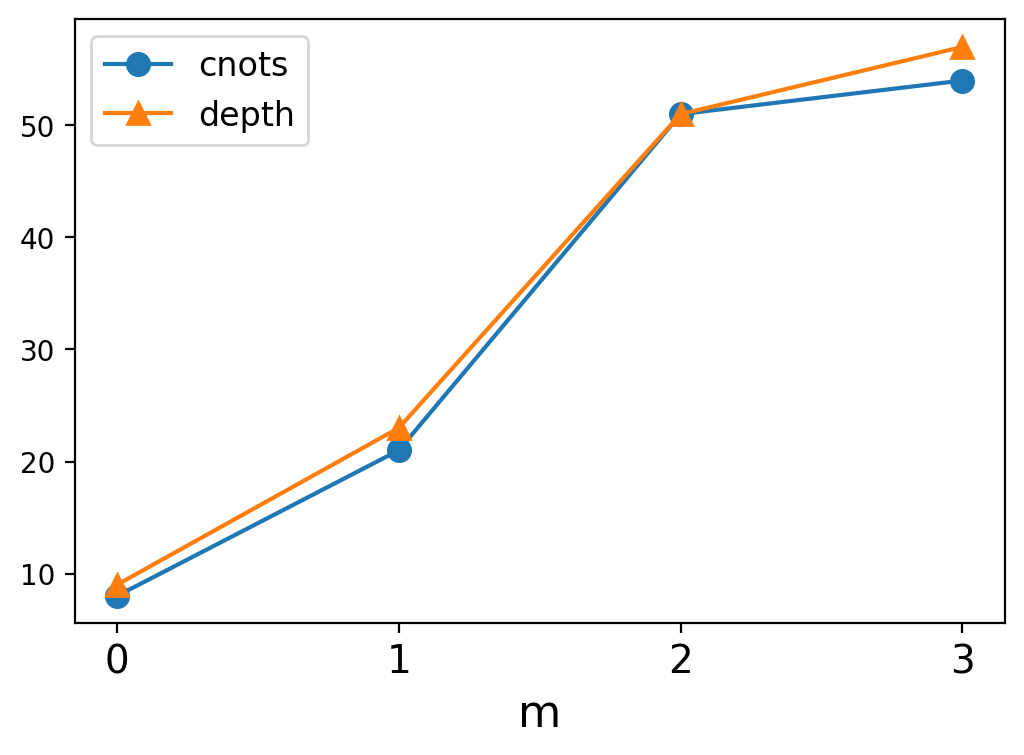

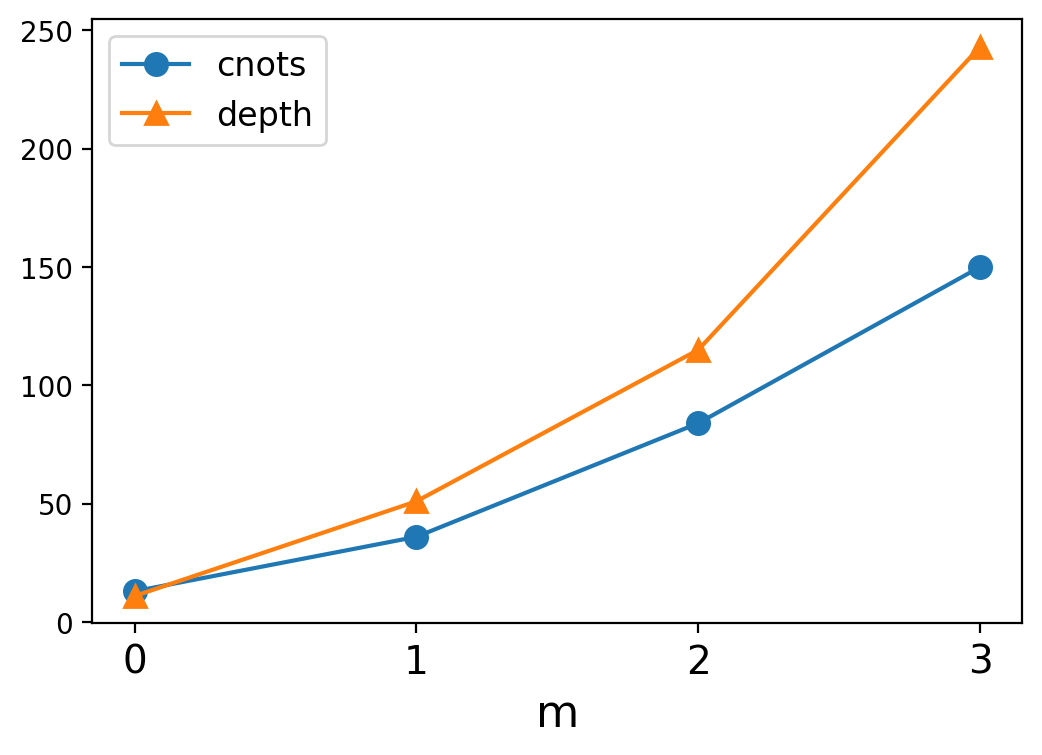

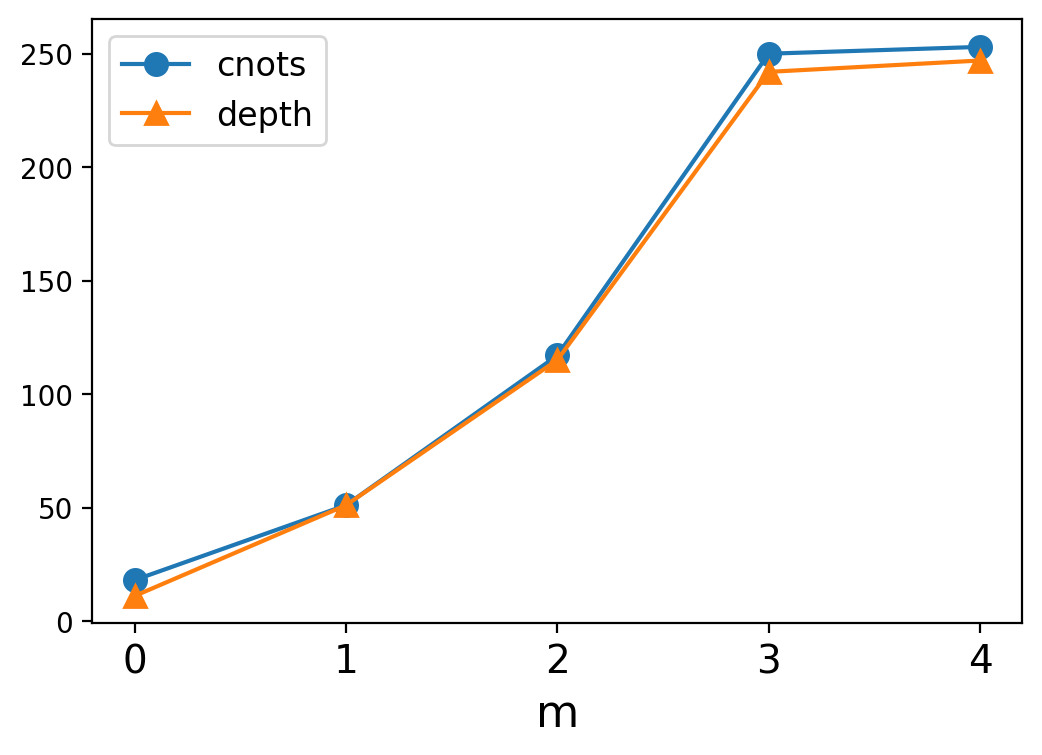

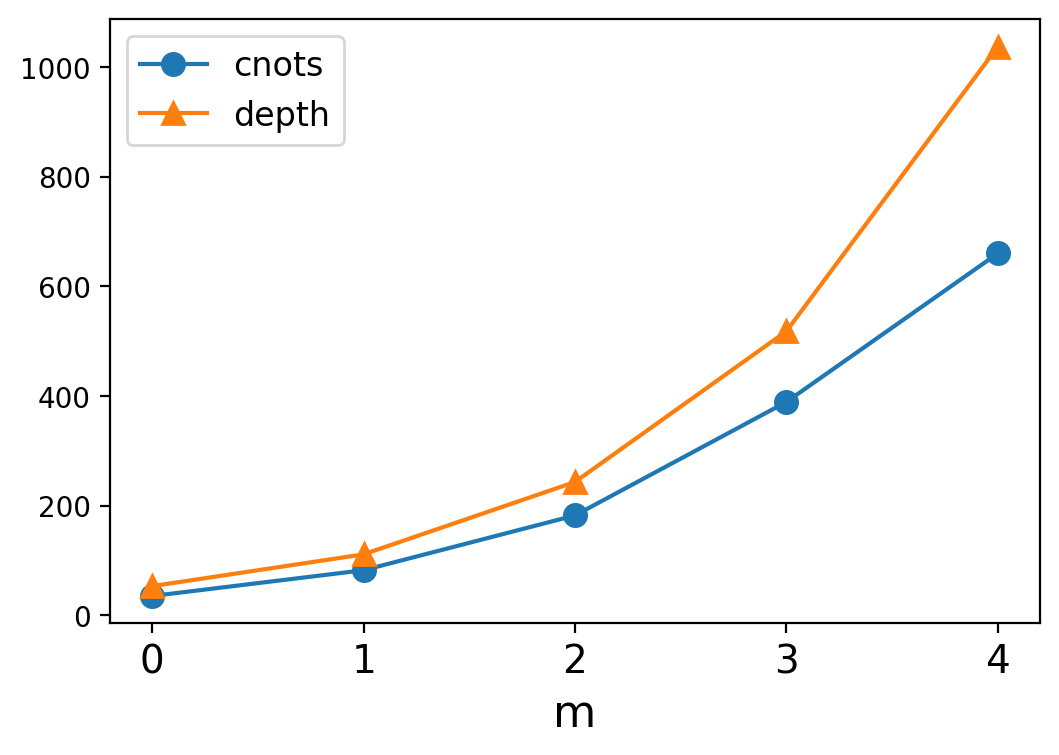

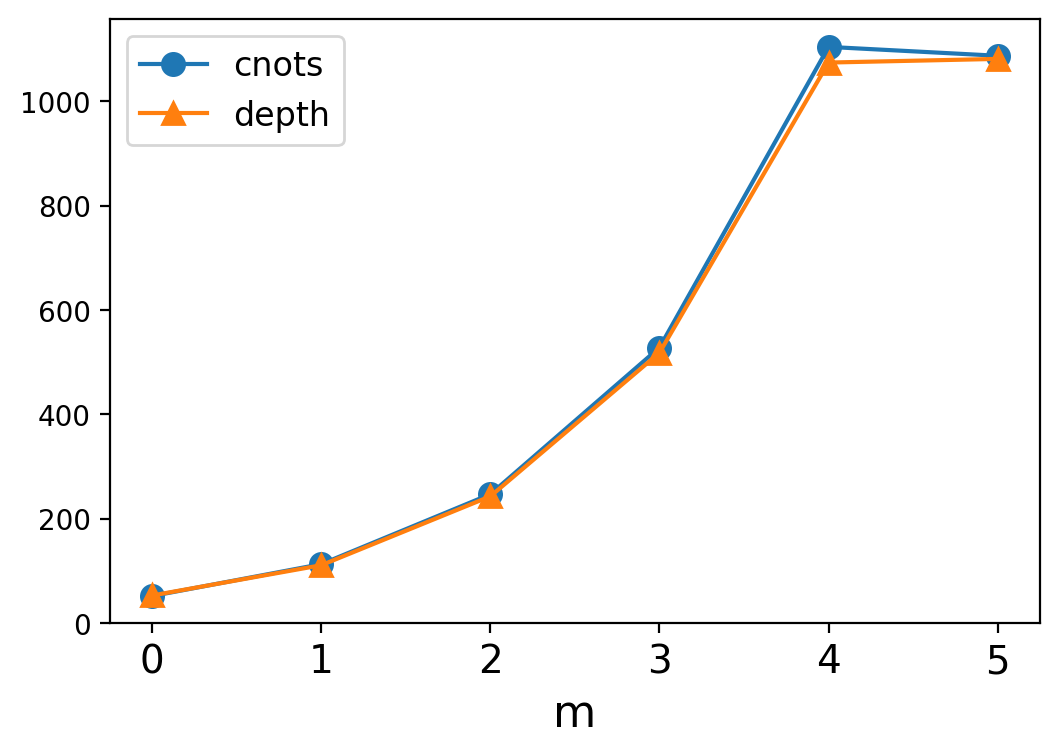

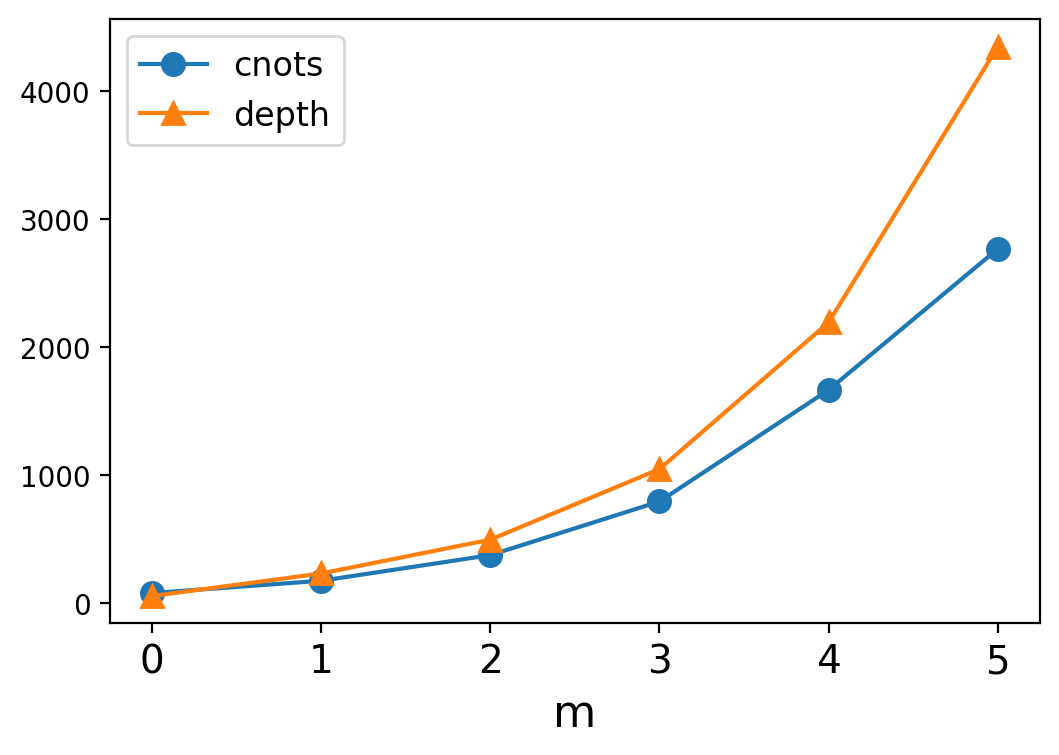

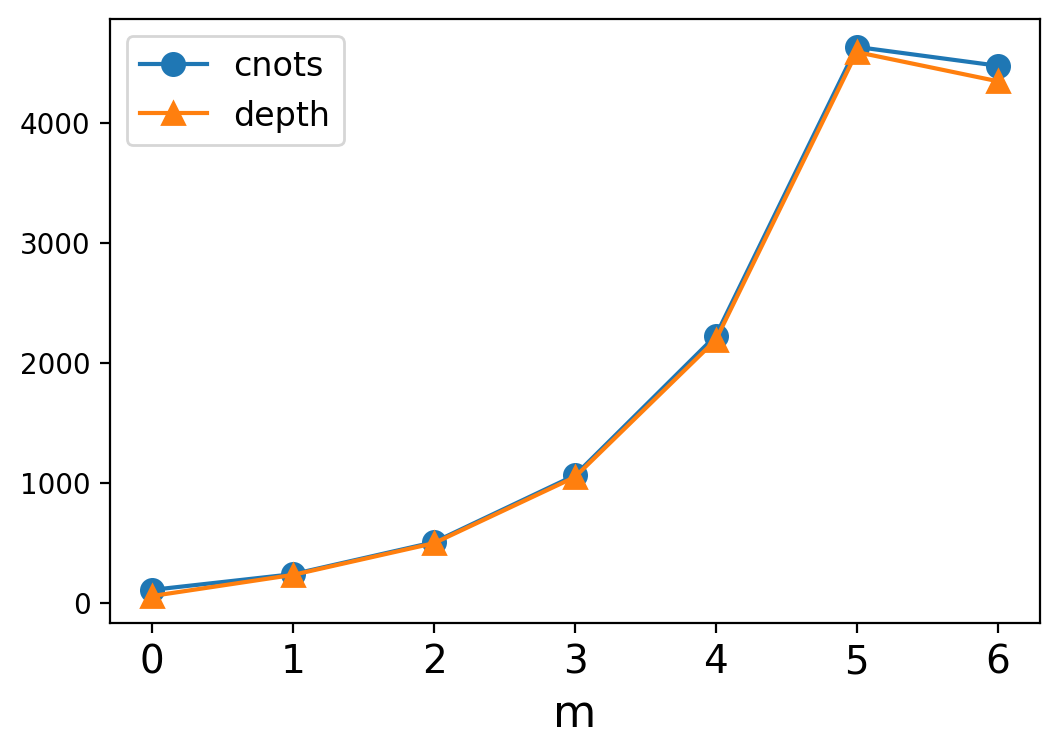

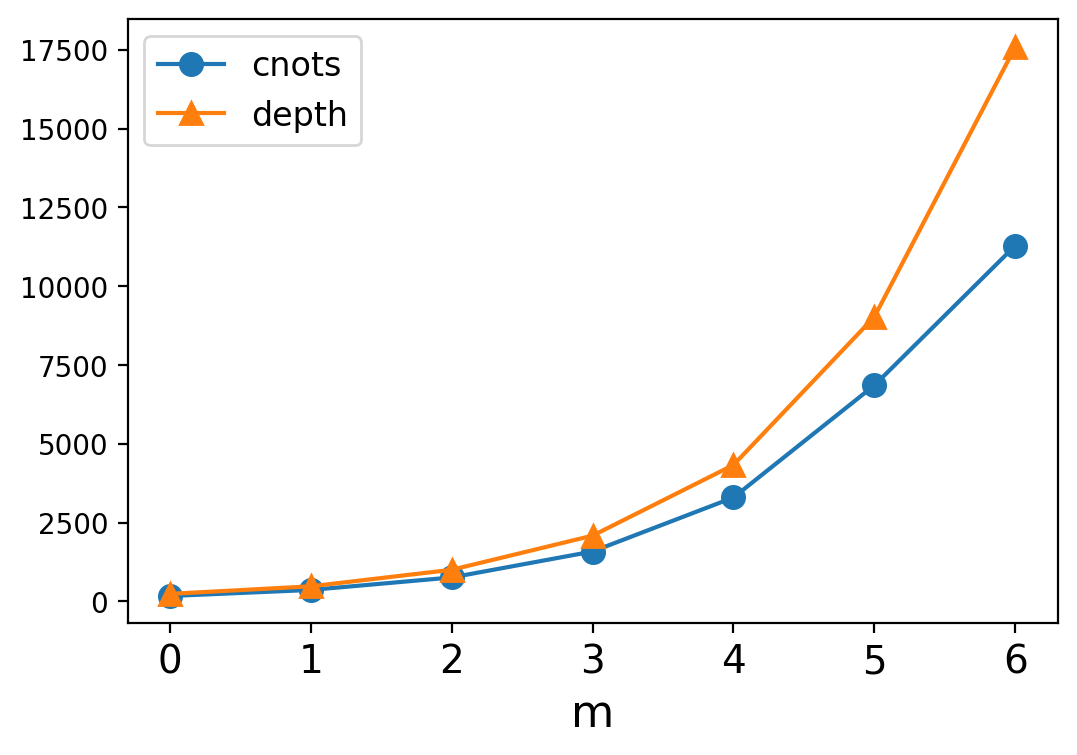

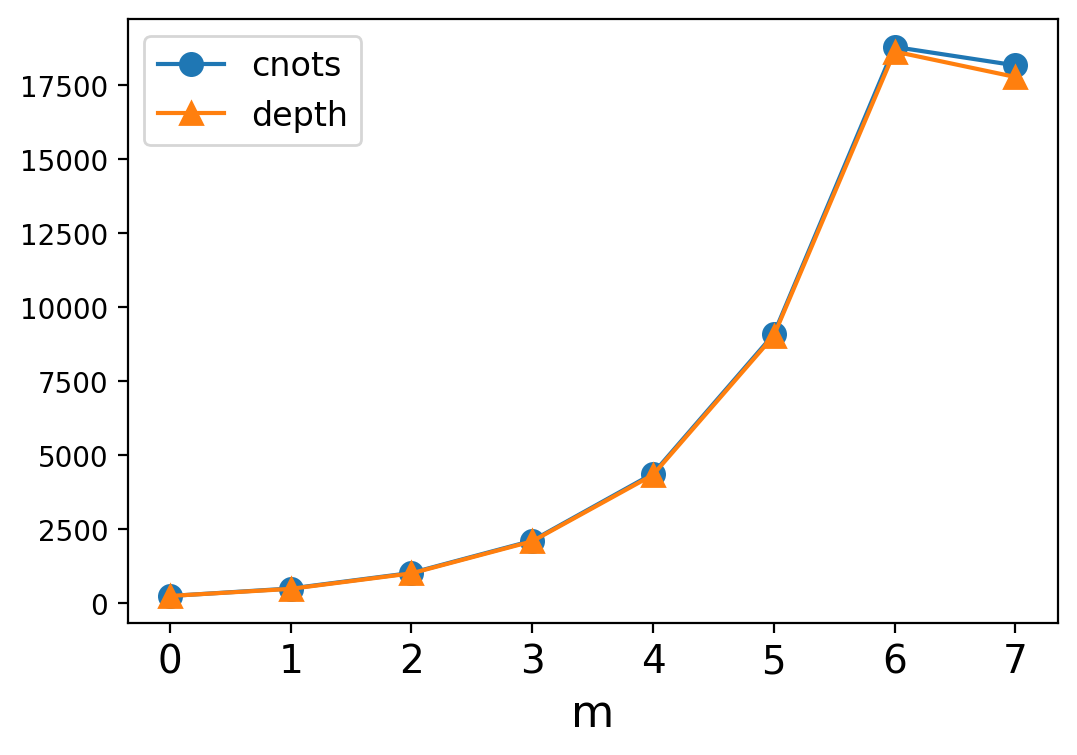

In [3]:
def plot(r, n_cx, n_dp):
    # libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Data
    df=pd.DataFrame({ 'x_values': r, 'cnots': n_cx, 'depth': n_dp })

    # multiple line plots
    plt.plot( 'x_values', 'cnots' , data=df, marker='o', markersize=8)
    plt.plot( 'x_values', 'depth' , data=df, marker='^', markersize=8)
    plt.xticks(r) # force integer on x axis
    # show legend
    plt.legend()
    
    # config
    plt.legend(fontsize=12)
    plt.xticks(r, fontsize=14)
    plt.xlabel('m', fontsize=16)
    plt.gcf().set_dpi(200)
    
    # show graph
    plt.show()

def plot_result(n, result):
    r_range = [r[0] for r in result[n]]
    n_cx    = [r[1] for r in result[n]]
    n_dp    = [r[2] for r in result[n]]

    plot(r_range, n_cx, n_dp)

for n in range(min_n, max_n+1):
    plot_result(n, result)